In [13]:
helpful analytics libraries installed https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from keras import Sequential
from keras.optimizers import SGD

from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction 
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes) 
    and took their brain signal in these particular environments

In [14]:
data = pd.read_csv(r"C:\Users\mikip\OneDrive\Desktop\EEG_Draft1\emotions.csv")

In [15]:
#chceking length of dataset
len(data)

2132

In [16]:
#Seprarting Positive,Neagtive and Neutral dataframes for plotting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

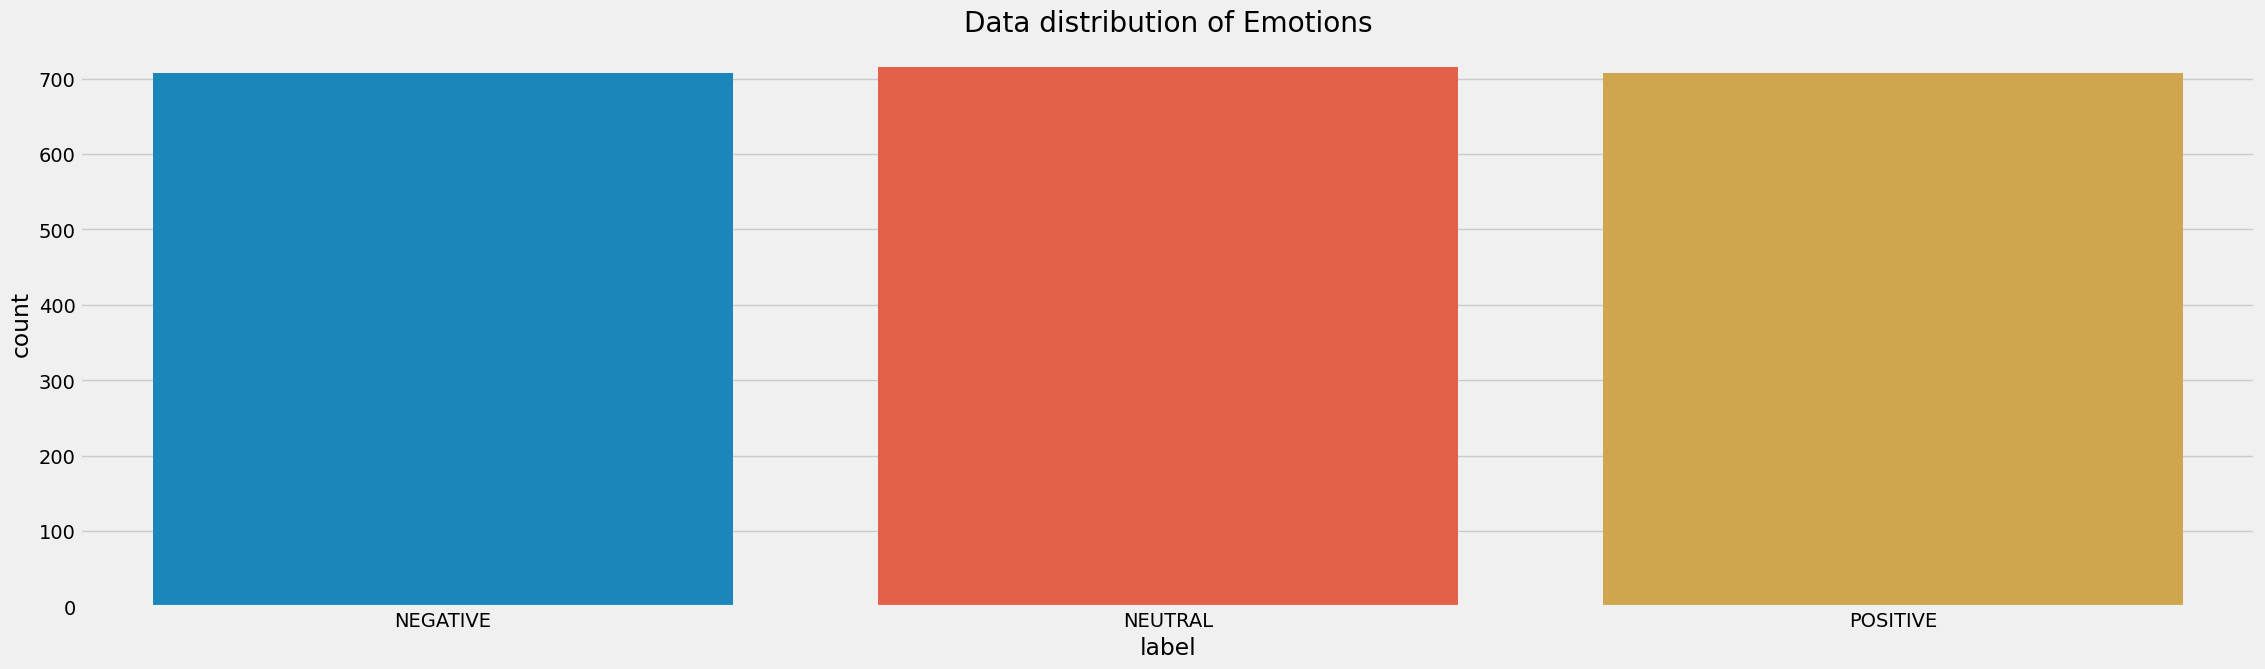

In [17]:
#plotting dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

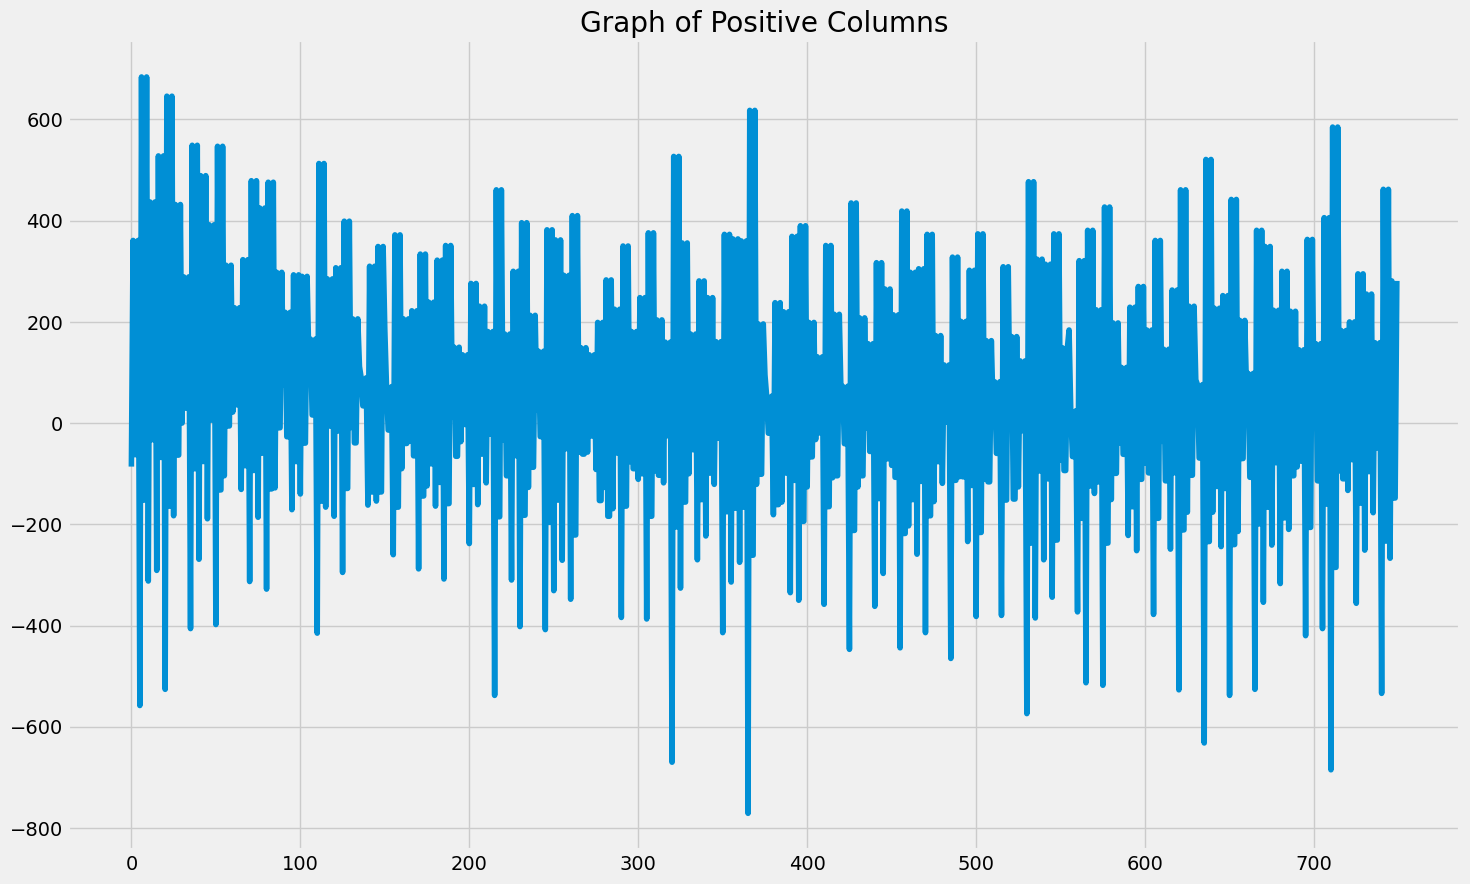

'As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'

In [18]:
#plotting positive Df
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

#As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600

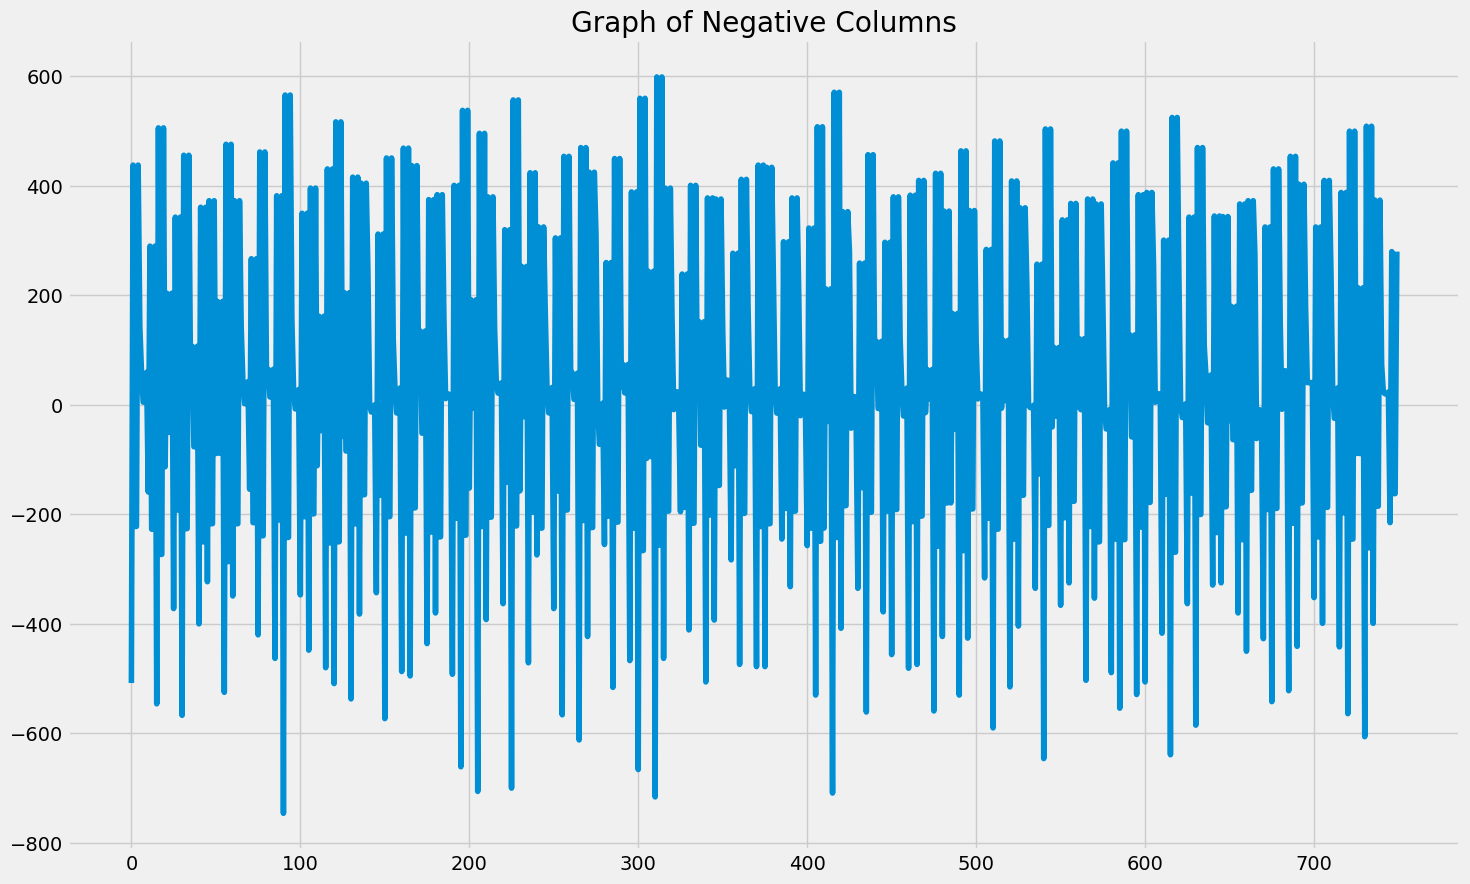

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [19]:
#plotting negative Df
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

#As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600

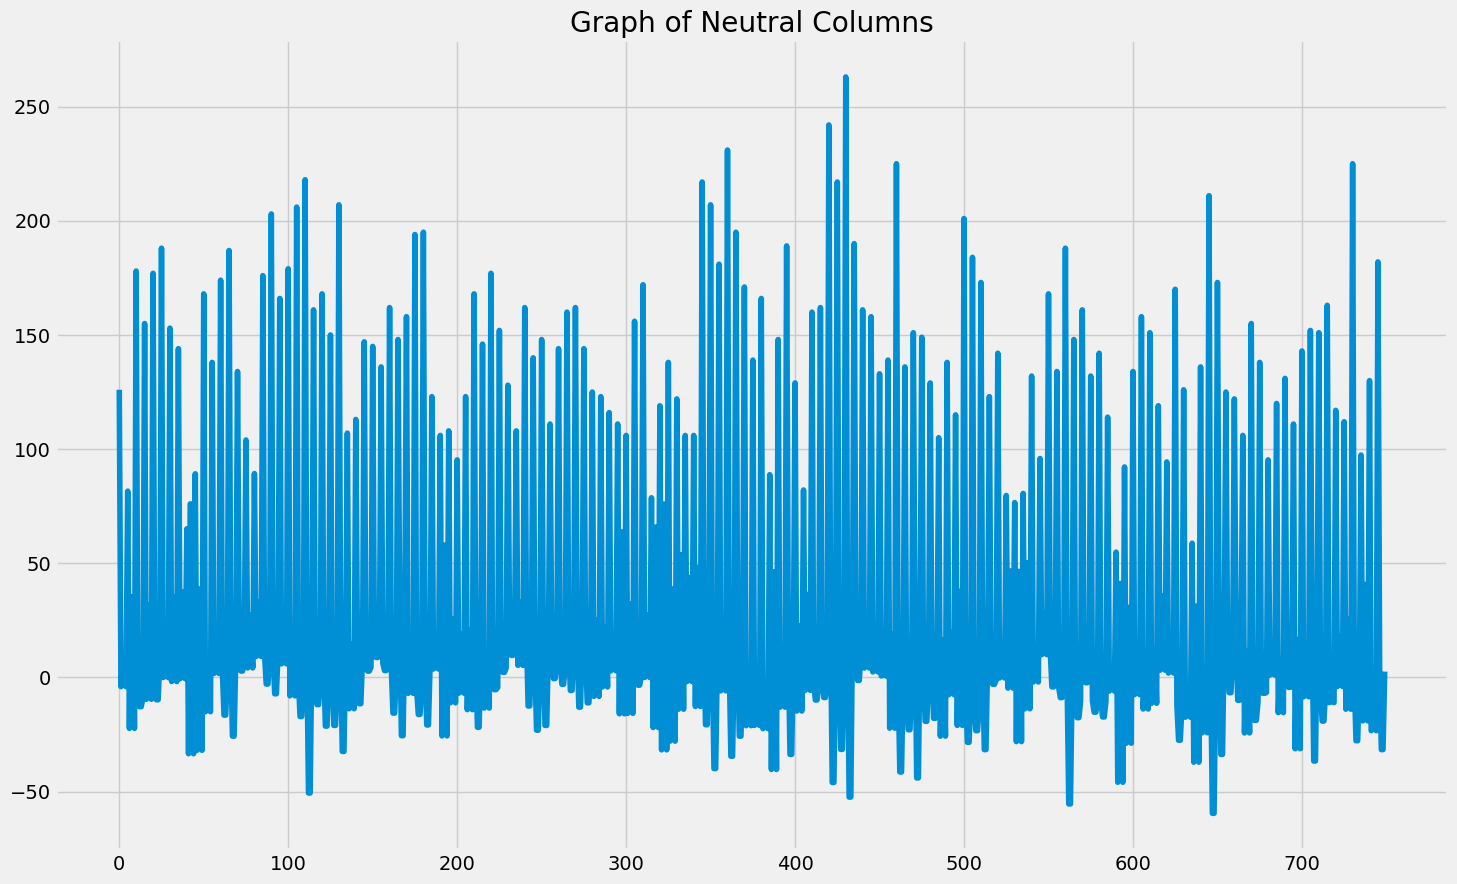

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [20]:
#plotting neutral Df
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

#As we can see the most of the Neutral Signals ae in between -50 to 250 

In [21]:
def Transform_data(data):
    #encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    
    #one hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [22]:
#calling the function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [23]:
#checking shape of dataset
x_train.shape[1]

2548

In [24]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    #hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    
    #flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [25]:
#creating model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 2548, 1)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [26]:
#Training and Evaluating model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 [==============================] - 162s 3s/step - loss: 0.6982 - accuracy: 0.8657 - val_loss: 0.4112 - val_accuracy: 0.9240
Epoch 2/10
48/48 [==============================] - 175s 4s/step - loss: 0.2017 - accuracy: 0.9322 - val_loss: 0.2210 - val_accuracy: 0.9240
Epoch 3/10
48/48 [==============================] - 224s 5s/step - loss: 0.1486 - accuracy: 0.9439 - val_loss: 0.1572 - val_accuracy: 0.9415
Epoch 4/10
48/48 [==============================] - 201s 4s/step - loss: 0.1064 - accuracy: 0.9654 - val_loss: 0.1342 - val_accuracy: 0.9298
Epoch 5/10
48/48 [==============================] - 189s 4s/step - loss: 0.0959 - accuracy: 0.9615 - val_loss: 0.3082 - val_accuracy: 0.9181
Epoch 6/10
48/48 [==============================] - 187s 4s/step - loss: 0.0545 - accuracy: 0.9778 - val_loss: 0.1640 - val_accuracy: 0.9474
Epoch 7/10
48/48 [==============================] - 191s 4s/step - loss: 0.0318 - accuracy: 0.9922 - val_loss: 0.2135 - val_accuracy: 0.9357
Epoch 8/10
48

In [27]:
#loss and accuracy of model on Testing Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 12.01150193810463 
Accuracy on Training: 96.25293016433716


In [28]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 [==============================] - 12s 839ms/step


In [29]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [31]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [32]:
#printing first 10 actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[150   3   0]
 [  2 132   8]
 [  0   3 129]]


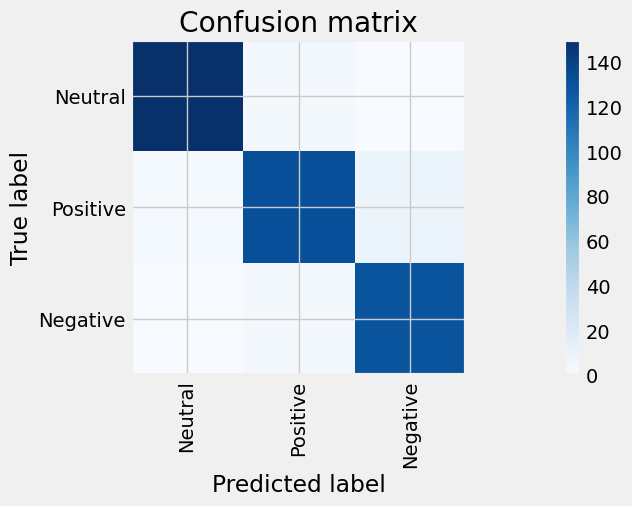

In [33]:
#plotting Confusion matrix of LSTM Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [34]:
names1 = ["Neutral","Positive","Negative"]


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.98      0.94 

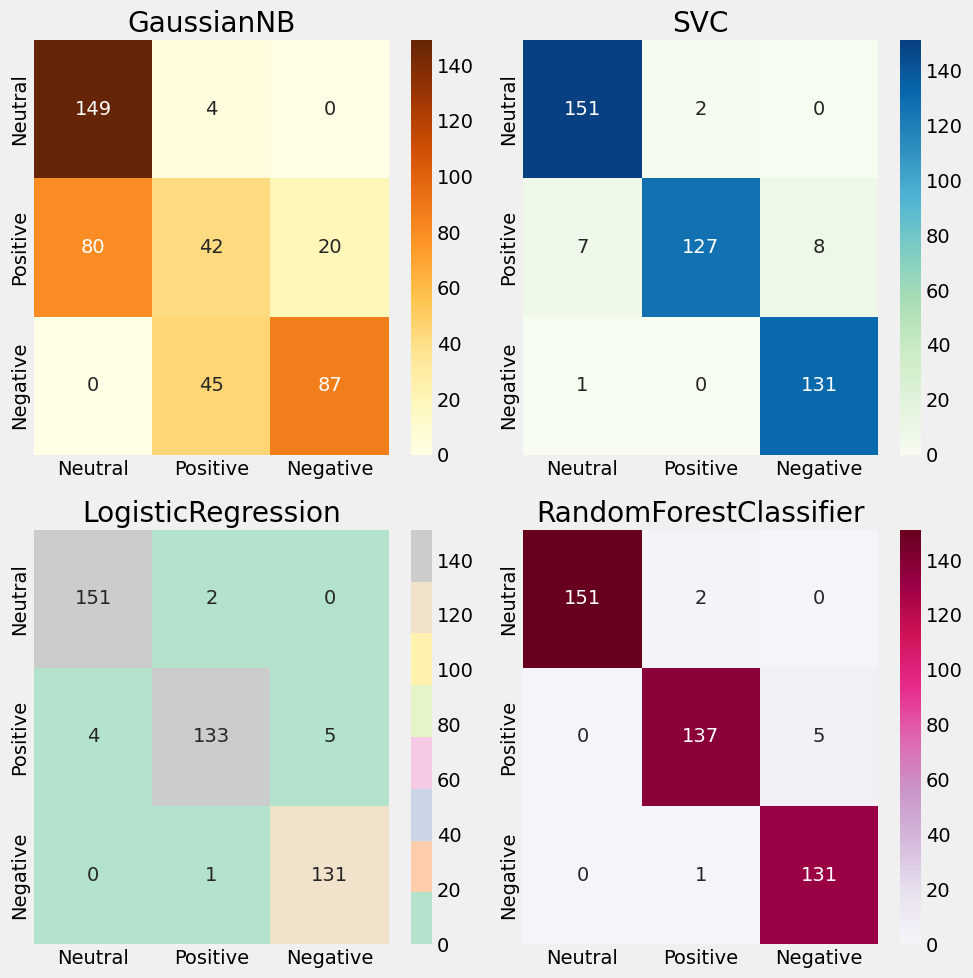

In [44]:
#Training our dataset on different Classifiers to check the results and creating their classification reports

#Naive Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)

print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)

#Support Vector Machine
Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)

print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)

#Logistic Regression
Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)

print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)

#Decision Tree Regressor
Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)

print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)

#Random Forest
Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)

print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)


from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
classifiers = [GaussianNB(), svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver='liblinear', C=75),
               RandomForestClassifier(n_estimators=50, random_state=0)]

for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    cls.fit(x_train, np.argmax(y_train, axis=1))
    pred = cls.predict(x_test)
    cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=c, ax=ax)
    ax.set_xticklabels(names1)
    ax.set_yticklabels(names1)
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.show()

In [42]:
#classification report of LSTM model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 [==============================] - 14s 934ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.96      0.93      0.94       142
           2       0.94      0.98      0.96       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



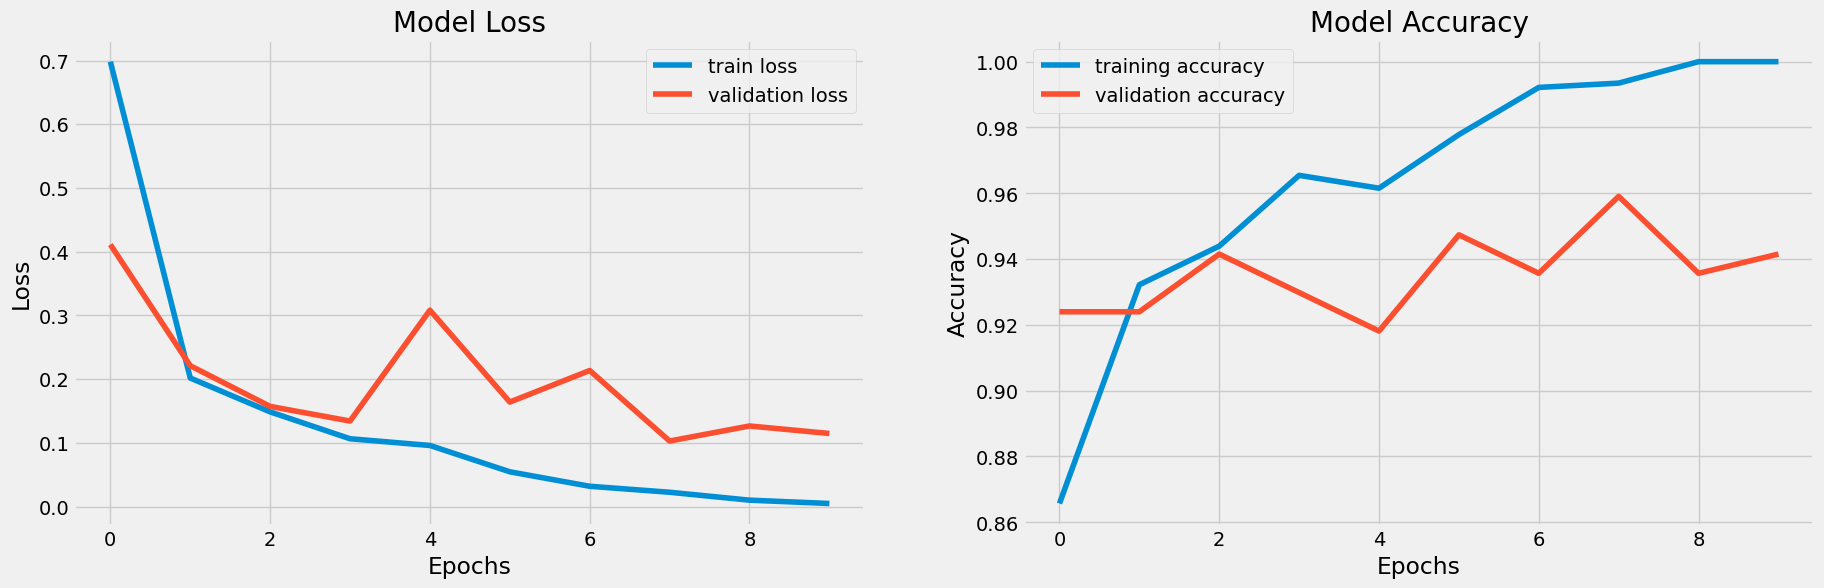

In [43]:
#plotting graph of LSTM model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()